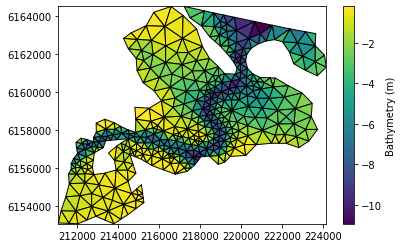

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mikeio import Mesh
meshfilename = r"..tests/testdata/odense_rough.mesh"

msh = Mesh(meshfilename)
msh.plot()

Convert mesh to [shapely](https://shapely.readthedocs.io/en/latest/manual.html) MultiPolygon object, requires that the `shapeply` library is installed.

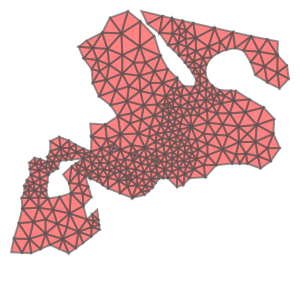

In [34]:
mp = msh.to_shapely()
mp

Now a lot of methods are available

In [36]:
mp.area

68931409.58160606

In [39]:
mp.bounds

(211068.501175313, 6153077.66681803, 224171.617336507, 6164499.42751662)

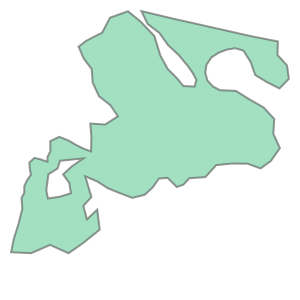

In [50]:
domain = mp.buffer(0)
domain

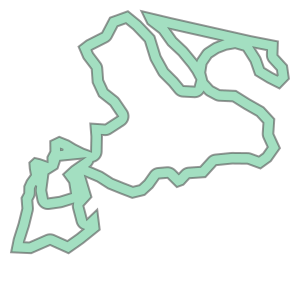

In [61]:
open_water = domain.buffer(-500)

coastalzone = domain - open_water
coastalzone

Find if points are inside the domain

In [32]:
from shapely.geometry import Point

p1 = Point(216000, 6162000)
p2 = Point(220000, 6156000)
print(mp.contains(p1))
print(mp.contains(p2))

True
False


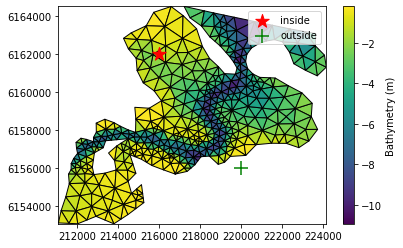

In [33]:
import matplotlib.pyplot as plt
msh.plot()
plt.scatter(p1.x,p1.y,marker="*",s=200,c="red",label="inside")
plt.scatter(p2.x,p2.y,marker="+",s=200,c="green",label="outside")
plt.legend()